# Verificación del modelo generado

El presente cuaderno de Jupyter tiene como objetivo comprobar que el modelo generado de manera automática a través de la herramienta resultante del proyecto ofrece los resultados esperados en base a su configuración.

In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from functions.model_scores import compute_metrics
%config InlineBackend.figure_format = 'retina'

En primer lugar se realiza la carga de dicho modelo, que fue serializado en su creación para posterior persistencia, así como los datos relativos a la serie que el modelo no ha aprendido en la fase de entrenamiento, simulando así datos nuevos.

In [2]:
model = pickle.load( open( "data/model", "rb" ) )

In [3]:
X = pickle.load( open( "data/X_test.data", "rb" ) )
y_true = pickle.load( open( "data/y_test.data", "rb" ) )

In [4]:
X.head()

,MelbourneTemperature,MelbourneTemperature-1,MelbourneTemperature-2,MelbourneTemperature-3,MelbourneTemperature-4,MelbourneTemperature-5,MelbourneTemperature-6,MelbourneTemperature-7,MelbourneTemperature-8,MelbourneTemperature-9,...,MelbourneTemperature-356,MelbourneTemperature-357,MelbourneTemperature-358,MelbourneTemperature-359,MelbourneTemperature-360,MelbourneTemperature-361,MelbourneTemperature-362,MelbourneTemperature-363,MelbourneTemperature-364,MelbourneTemperature-365
1989-03-14,15.1,12.8,17.7,17.8,18.3,21.4,20.3,18.9,18.3,20.3,...,15.6,15.1,13.7,13.9,15.3,15.7,14.5,13.4,11.8,11.9
1989-03-15,15.0,15.1,12.8,17.7,17.8,18.3,21.4,20.3,18.9,18.3,...,14.4,15.6,15.1,13.7,13.9,15.3,15.7,14.5,13.4,11.8
1989-03-16,14.8,15.0,15.1,12.8,17.7,17.8,18.3,21.4,20.3,18.9,...,13.9,14.4,15.6,15.1,13.7,13.9,15.3,15.7,14.5,13.4
1989-03-17,12.0,14.8,15.0,15.1,12.8,17.7,17.8,18.3,21.4,20.3,...,16.2,13.9,14.4,15.6,15.1,13.7,13.9,15.3,15.7,14.5
1989-03-18,12.5,12.0,14.8,15.0,15.1,12.8,17.7,17.8,18.3,21.4,...,16.7,16.2,13.9,14.4,15.6,15.1,13.7,13.9,15.3,15.7


In [5]:
y_true.head()

,MelbourneTemperature+1
1989-03-14,15.0
1989-03-15,14.8
1989-03-16,12.0
1989-03-17,12.5
1989-03-18,15.0


Utilizando el modelo y datos cargados se procede a computar sus valores predichos cuya cabecera se muestra a continuación.

In [6]:
y_pred = y_true.copy()
y_pred["MelbourneTemperature+1"] = model.predict(X)
y_pred.head()

,MelbourneTemperature+1
1989-03-14,15.533797
1989-03-15,16.990790
1989-03-16,14.904623
1989-03-17,14.458817
1989-03-18,14.501287


La siguiente tabla construida facilita una comparativa de la distribución de ambas series, en la que se puede comprobar que efectivamente el modelo ha aprendido de los datos de entrenamiento, siendo capaz de extrapolarlo a los nuevos eventos. Esta conclusión se obtiene al observar que los valores de media, desviación típica, y percentiles se encuentran en el mismo orden de magnitud. La diferencia más amplia se da al apreciar el mínimo y máximo, notando que los valores extremos son los que menor precisión presentan. No obstante, esto es lo esperado, pues la configuración del modelo que los proporciona se trata de la implementación más sencilla correspondiente a una regresión lineal que sigue el método de mínimos cuadrados lineales.

In [7]:
comparison = pd.concat([y_true.describe(), y_pred.describe()], axis=1)
comparison.columns = ['Valores reales', 'Valores predichos']
comparison

,Valores reales,Valores predichos
count,657.000000,657.000000
mean,10.926027,11.026866
std,3.877209,3.374936
min,0.500000,2.571961
25%,8.000000,8.138609
50%,10.600000,10.969687
75%,13.800000,13.864366
max,22.100000,19.471597


El razonamiento anterior se puede ver representado a simple vista en el siguiente gráfico temporal, donde en azul se visualizan los valores reales y en naranja los predichos por el modelo.

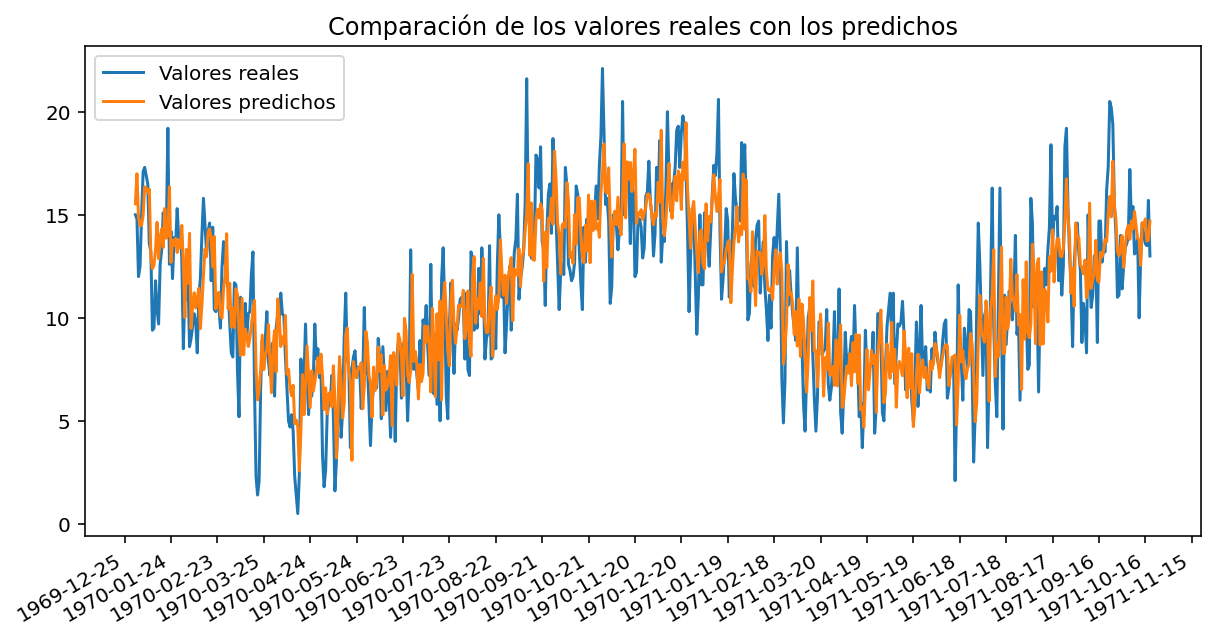

In [8]:
plt.figure(figsize=(10,5))
plt.plot(y_true)
plt.plot(y_pred)
plt.legend(['Valores reales', 'Valores predichos'])
plt.title("Comparación de los valores reales con los predichos")
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))

El mismo gráfico, pero sin la escala temporal, puede observarse a continuación en comparación con una predicción ideal.

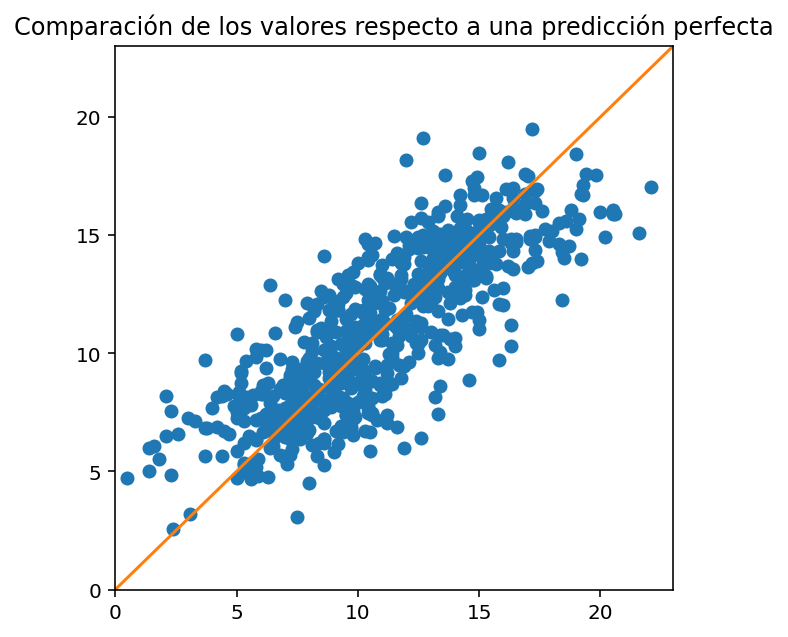

In [9]:
plt.figure(figsize=(5,5))
plt.plot(y_true, y_pred, linestyle="", marker="o")
plt.title("Comparación de los valores respecto a una predicción perfecta")
plt.axis([0, 23, 0, 23])
plt.plot(range(0,25,1))

Por último, se visualiza la salida de la función `compute_metrics` implementada para obtener el resumen de las métricas solicitadas en formato lista y que se aplican sobre los valores predichos en comparación con los reales.

In [10]:
metrics = ['r2', 'explained_variance', 'max_error', 'mean_absolute_error', 'root_mean_squared_error', 'mean_squared_error', 'mean_squared_log_error', 'median_absolute_error', 'mean_tweedie_deviance', 'mean_poisson_deviance', 'mean_gamma_deviance']
compute_metrics(metrics, y_true, y_pred)

{'r2': 0.6522386578736817,
 'explained_variance': 0.652916110264546,
 'max_error': 6.51003889157276,
 'mean_absolute_error': 1.7912818686440202,
 'root_mean_squared_error': 2.2846996995463056,
 'mean_squared_error': 5.2198527171069795,
 'mean_squared_log_error': 0.05649189686128375,
 'median_absolute_error': 1.5090549204666175,
 'mean_tweedie_deviance': 5.2198527171069795,
 'mean_poisson_deviance': 0.5451588553899103,
 'mean_gamma_deviance': 0.06979607835332077}